# Imports

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import matplotlib
import researchpy as rp
import importlib
import analysis as an
warnings.filterwarnings('ignore')

In [40]:
importlib.reload(an);

In [41]:
listNames = ['Khulan','Adrian','Mathilde','Virgil','FannyM','Margaux','JL','Hélène','Luca','Brice','ThiMai','Ani','Romain','StephB']
_type=['Grasshopper', 'Hybrid', 'Plugin']
niv=['No experience','Novice','Limited','Basic','Advanced','Expert']

# Iterations

In [42]:
iterations_df=pd.read_csv('input/iterations.csv')
unique_df=pd.read_csv('input/unique.csv')
phase_df=pd.read_csv('input/phase.csv')
time_iterations_df=pd.read_csv('input/time_iterations.csv')
time_unique_df=pd.read_csv('input/time_unique.csv')
time_phases_df=pd.read_csv('input/time_phases.csv')
feedback_df=pd.read_csv('input/feedback.csv')
iterations_df.set_index(['Name','Level','Order','Type','Object'],inplace=True)
unique_df.set_index(['Name','Level','Order','Type','Object'],inplace=True)
phase_df.set_index(['Name','Level','Order','Type','Object'],inplace=True)
time_iterations_df.set_index(['Name','Level','Order','Type','Object'],inplace=True)
time_phases_df.set_index(['Name','Level','Order','Type','Object'],inplace=True)
time_unique_df.set_index(['Name','Level','Order','Type','Object'],inplace=True)

In [43]:
matplotlib.rcParams['axes.autolimit_mode'] = 'round_numbers'
matplotlib.rcParams['axes.xmargin'] = 0
matplotlib.rcParams['axes.ymargin'] = 0

In [44]:
#with pd.option_context('display.max_rows', None, 'display.max_columns', 12,'display.max_colwidth',50):
    #display(iterations_df.round(decimals=2))
iterations_df.round(decimals=2).to_excel('output/Iterations.xlsx')

## Étude Générale

In [45]:
t=iterations_df.reset_index(level='Level', drop=False)
t['Level']=t['Level'].apply(lambda x: int(str(x)[8]))
t=t.xs('Tot',level='Type')
rate=pd.Series(t['Total']/(t['Time']/60),name='Rate')
display(rp.summary_cont(rate))
display(rp.summary_cont((t['Total']/(t['Time']/60)).groupby(t['Level'])))
#display(t.xs('Tot',level='Type')['Total'])#.groupby('Name').mean()
#display(t['Level'].sort_values().unique())

Variable     N     Mean      SD      SE  95% Conf.  Interval
0     Rate  14.0  10.6569  4.1946  1.1211      8.235   13.0788

N     Mean      SD      SE  95% Conf.  Interval
Level                                                 
0      1   9.2810     NaN     NaN        NaN       NaN
1      3  13.5259  7.3002  4.2148    -4.6088   31.6606
2      6  10.9699  2.6068  1.0642     8.2343   13.7056
3      3   7.6030  4.0628  2.3457    -2.4896   17.6955
4      1  10.7096     NaN     NaN        NaN       NaN

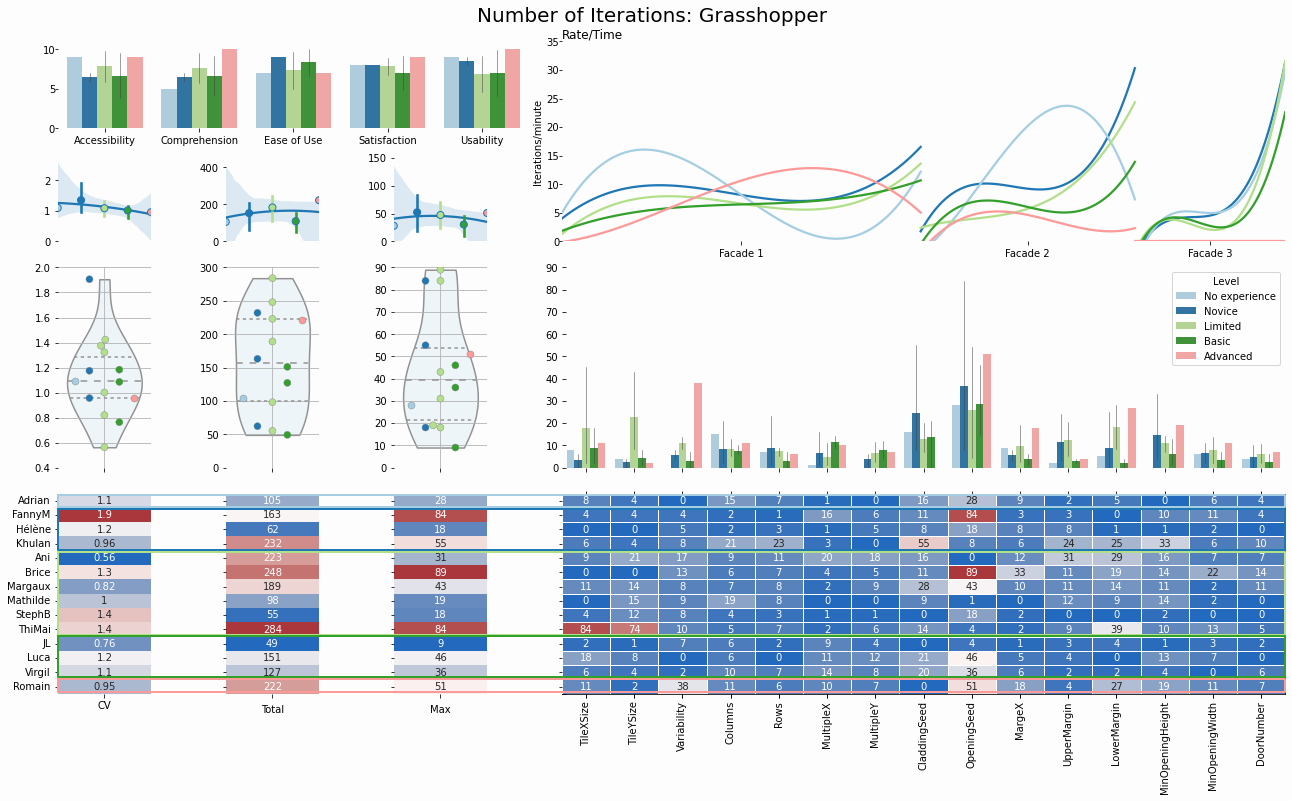

In [46]:
an.context_analysis(0, iterations_df, time_iterations_df, feedback_df, study_columns=['CV', 'Total', 'Max'], b=8, title='Iterations')
plt.savefig('output/gh_iterations.png',bbox_inches='tight')

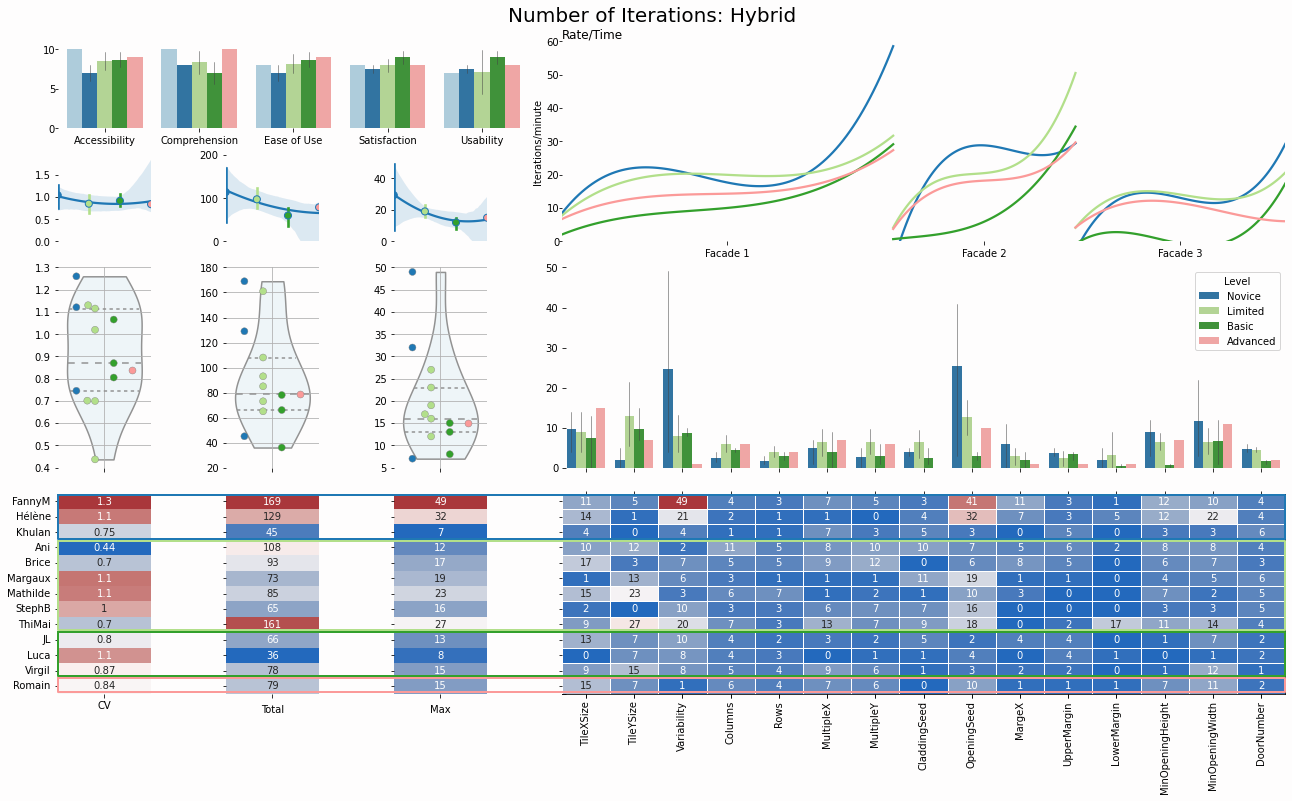

In [47]:
an.context_analysis(1, iterations_df.drop('Adrian', axis=0, level='Name'), time_iterations_df.drop('Adrian', axis=0, level='Name'), feedback_df, study_columns=['CV', 'Total', 'Max'], b=8, title='Iterations', y2=0.1785)
plt.savefig('output/hybrid_iterations.png',bbox_inches='tight')

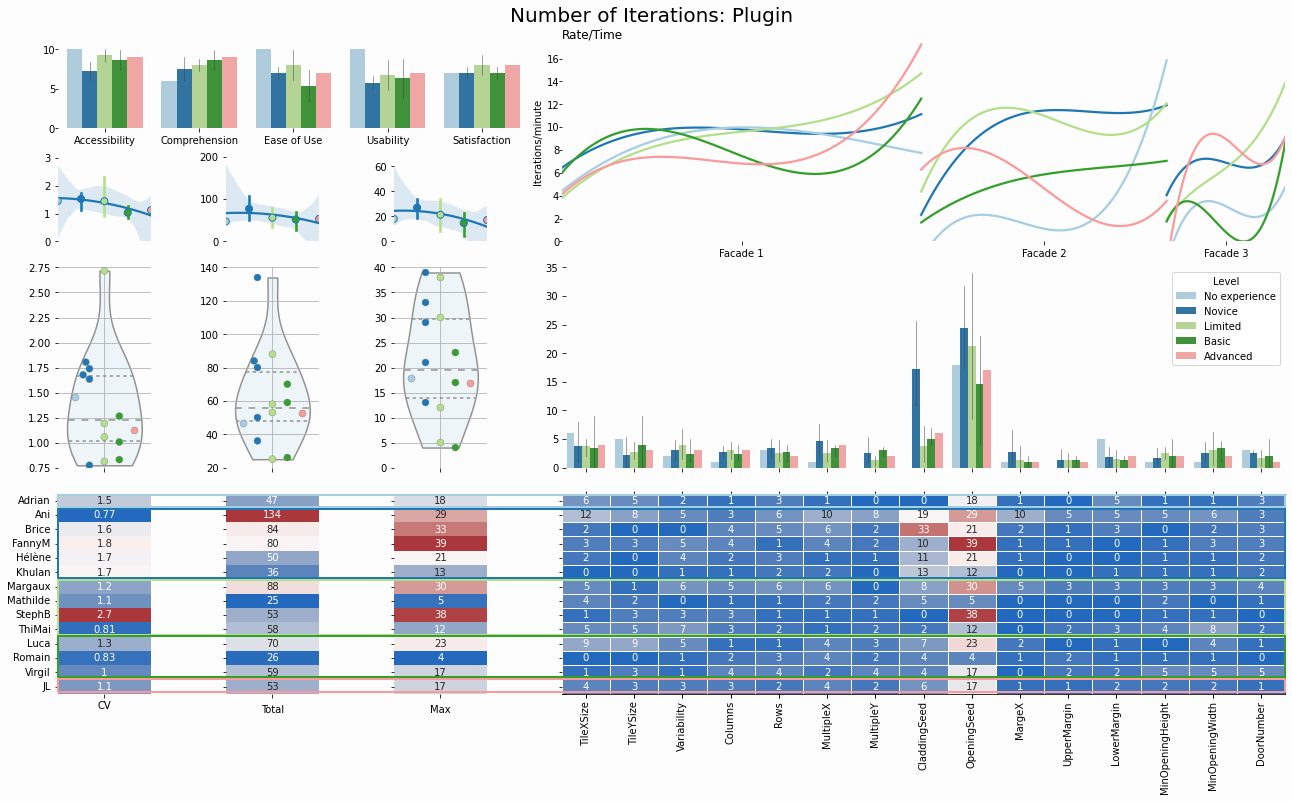

In [48]:
an.context_analysis(2, iterations_df, time_iterations_df, feedback_df, study_columns=['CV', 'Total', 'Max'], b=3, title='Iterations')
plt.savefig('output/plugin_iterations.png',bbox_inches='tight')

### Total

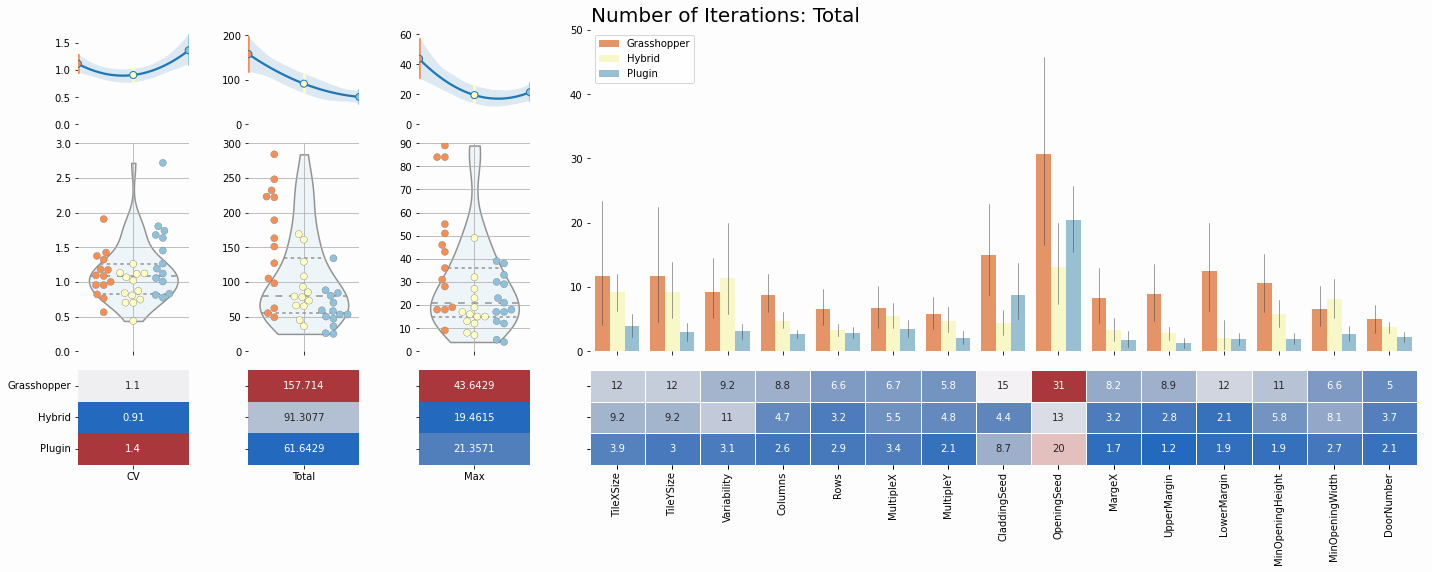

In [49]:
studycolumn=['CV','Total','Max']
an.global_analysis(iterations_df, studycolumn, 'Number of Iterations')
plt.savefig('output/global_iterations.png',bbox_inches='tight')

## Etude selon l'ordre

### Grasshopper

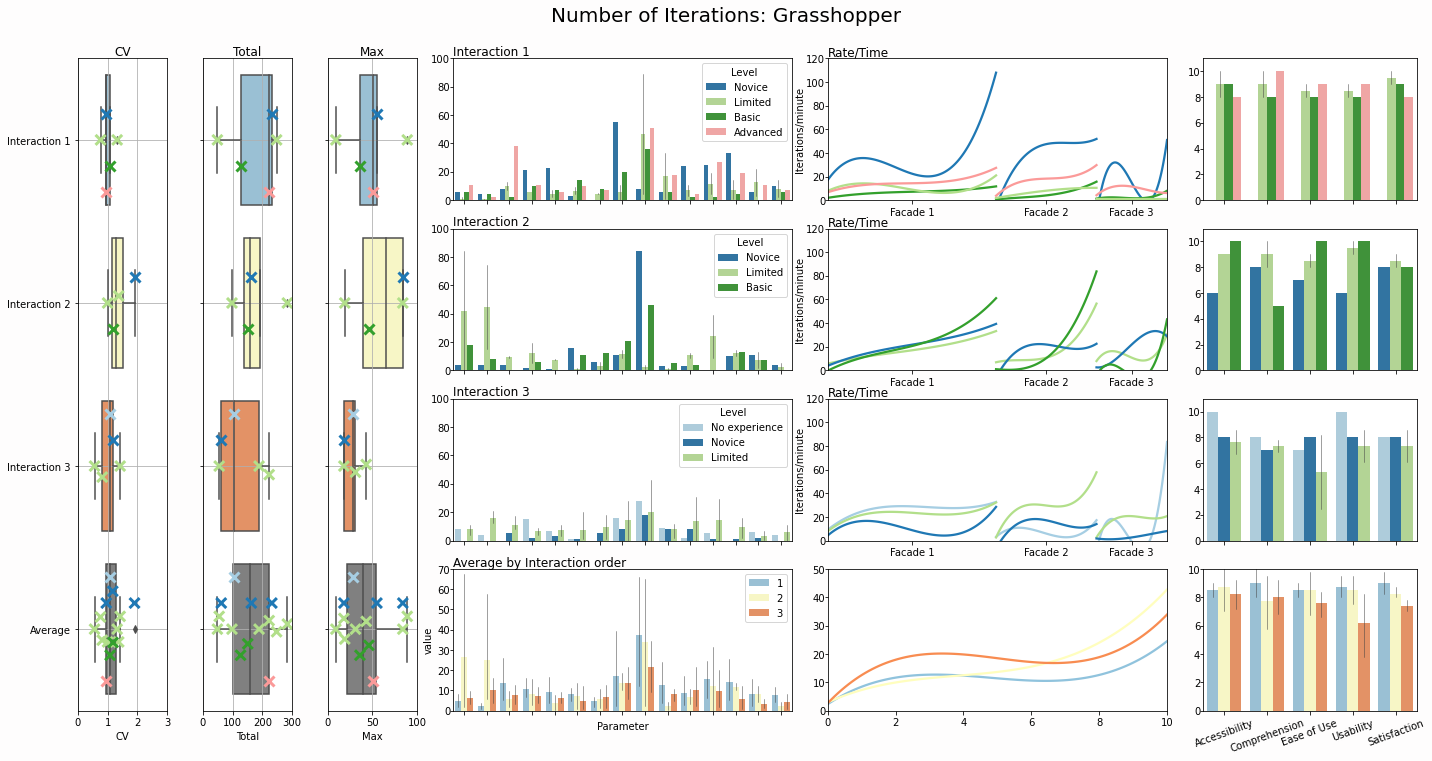

In [50]:
keeplist1 =['CV','Total','Max']
an.order_analysis(1, iterations_df, time_iterations_df, feedback_df, keeplist1, 4, 'Iterations')
plt.savefig('output/gh_order_iterations.png',bbox_inches='tight')

### Hybrid

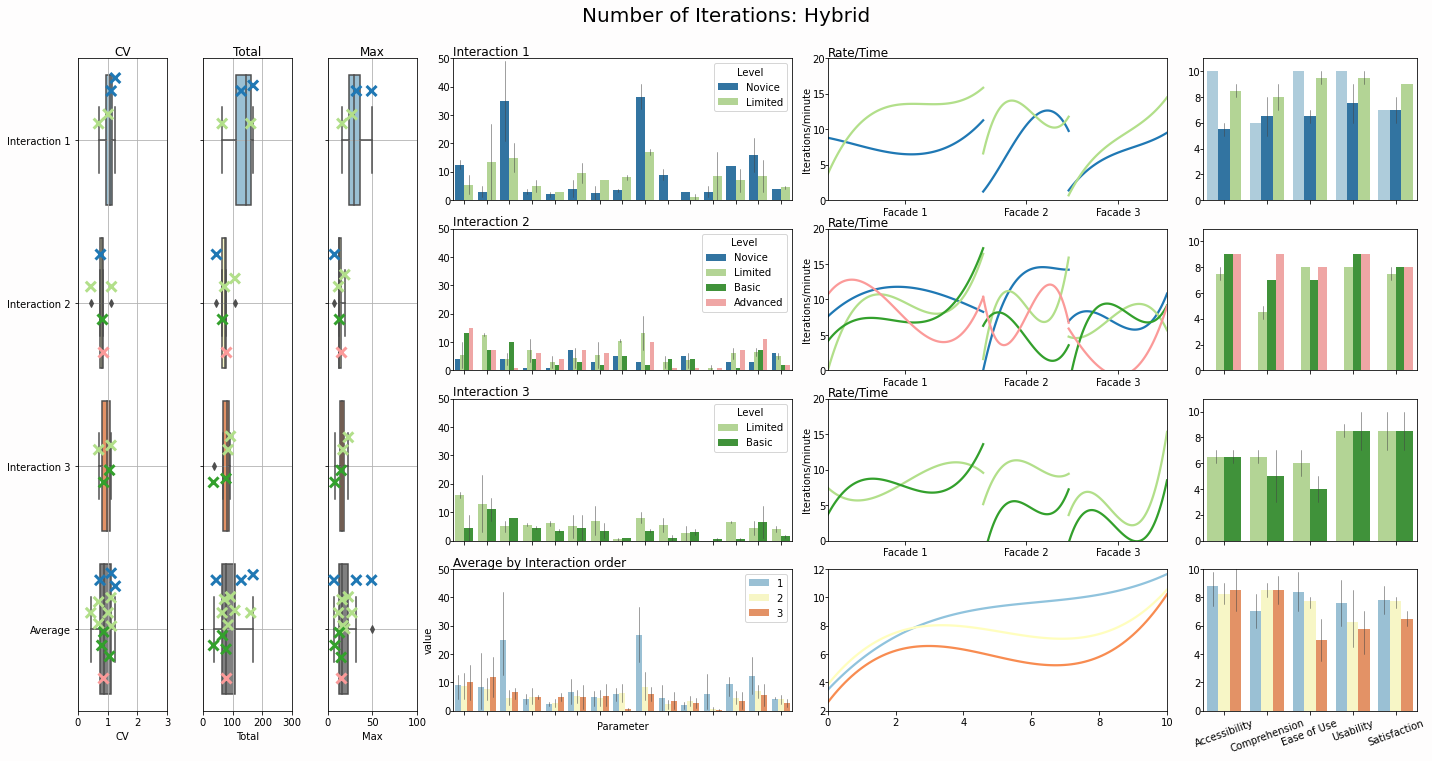

In [51]:
an.order_analysis(2, iterations_df, time_iterations_df.drop('Adrian', axis=0, level='Name'), feedback_df, keeplist1, 8, 'Iterations')
plt.savefig('output/hybrid_order_iterations.png',bbox_inches='tight')

### Plugin

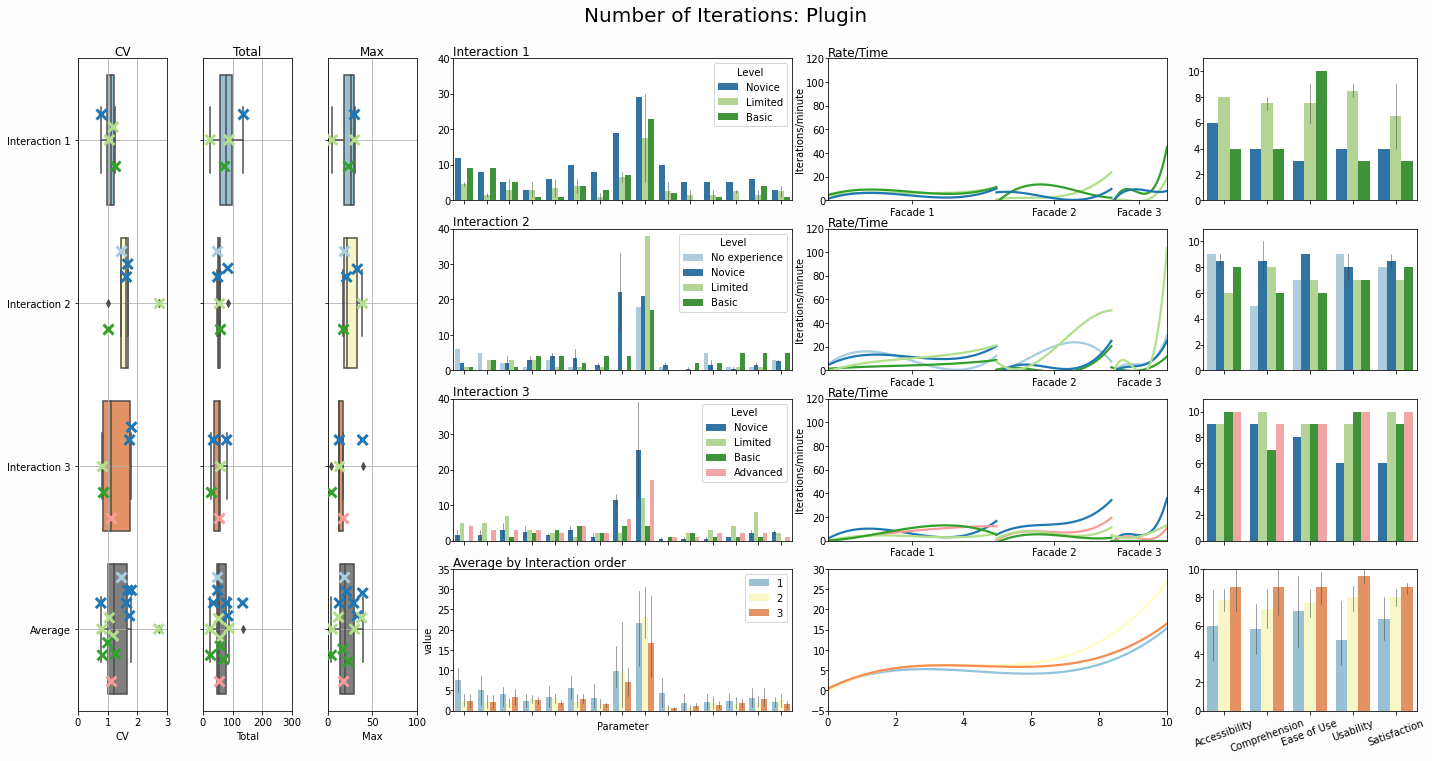

In [52]:
an.order_analysis(3, iterations_df, time_iterations_df, feedback_df, keeplist1, 3, 'Iterations')
plt.savefig('output/plugin_order_iterations.png',bbox_inches='tight')

# Phases

In [53]:
with pd.option_context('display.max_rows', None, 'display.max_columns', 12,'display.max_colwidth',50):
    display(phase_df.round(decimals=2))
iterations_df.round(decimals=2).to_excel('output/testexcel.xlsx')

TileXSize  TileYSize  \
Name     Level     Order Type               Object                         
Khulan   303112001 1     Grasshopper        2            1.00       1.00   
                                            3            1.00       0.00   
                                            4            0.00       0.00   
                   2     Hybrid             2            0.00       0.00   
                                            3            1.00       0.00   
                                            4            1.00       0.00   
                   3     Plugin             2            0.00       0.00   
                                            3            0.00       0.00   
                                            4            0.00       0.00   
                   0     Tot                0            4.00       1.00   
                         Average            0            0.44       0.11   
                         Standard Deviation 0            0.53       0.33   
Adrian   404000100 3     Grasshopper        2            1.00       1.00   
                                            3            0.00       2.00   
                                            4            1.00       0.00   
                   2     Plugin             2            1.00       1.00   
                                            3            1.00       2.00   
                                            4            1.00       1.00   
                   0     Tot                0            9.00      10.00   
                         Average            0            1.00       1.11   
                         Standard Deviation 0            0.50       0.60   
Mathilde 404223002 2     Grasshopper        2            0.00       1.00   
                                            3            0.00       0.00   
                                            4            0.00       0.00   
                   3     Hybrid             2            0.00       0.00   
                                            3            1.00       3.00   
                                            4            1.00       1.00   
                   1     Plugin             2            1.00       1.00   
                                            3            1.00       0.00   
                                            4            1.00       0.00   
                   0     Tot                0            5.00       6.00   
                         Average            0            0.56       0.67   
                         Standard Deviation 0            0.53       1.00   
Virgil   303334003 1     Grasshopper        2            2.00       1.00   
                                            3            1.00       1.00   
                                            4            0.00       0.00   
                   3     Hybrid             2            2.00       2.00   
                                            3            0.00       0.00   
                                            4            0.00       0.00   
                   2     Plugin             2            1.00       1.00   
                                            3            0.00       1.00   
                                            4            0.00       0.00   
                   0     Tot                0            6.00       6.00   
                         Average            0            0.67       0.67   
                         Standard Deviation 0            0.87       0.71   
FannyM   404113101 2     Grasshopper        2            1.00       1.00   
                                            3            0.00       0.00   
                                            4            0.00       0.00   
                   1     Hybrid             2            2.00       2.00   
                                            3            0.00       0.00   
                                            4            0.00       0.00   
                   3    

## Étude Générale

### Grasshopper

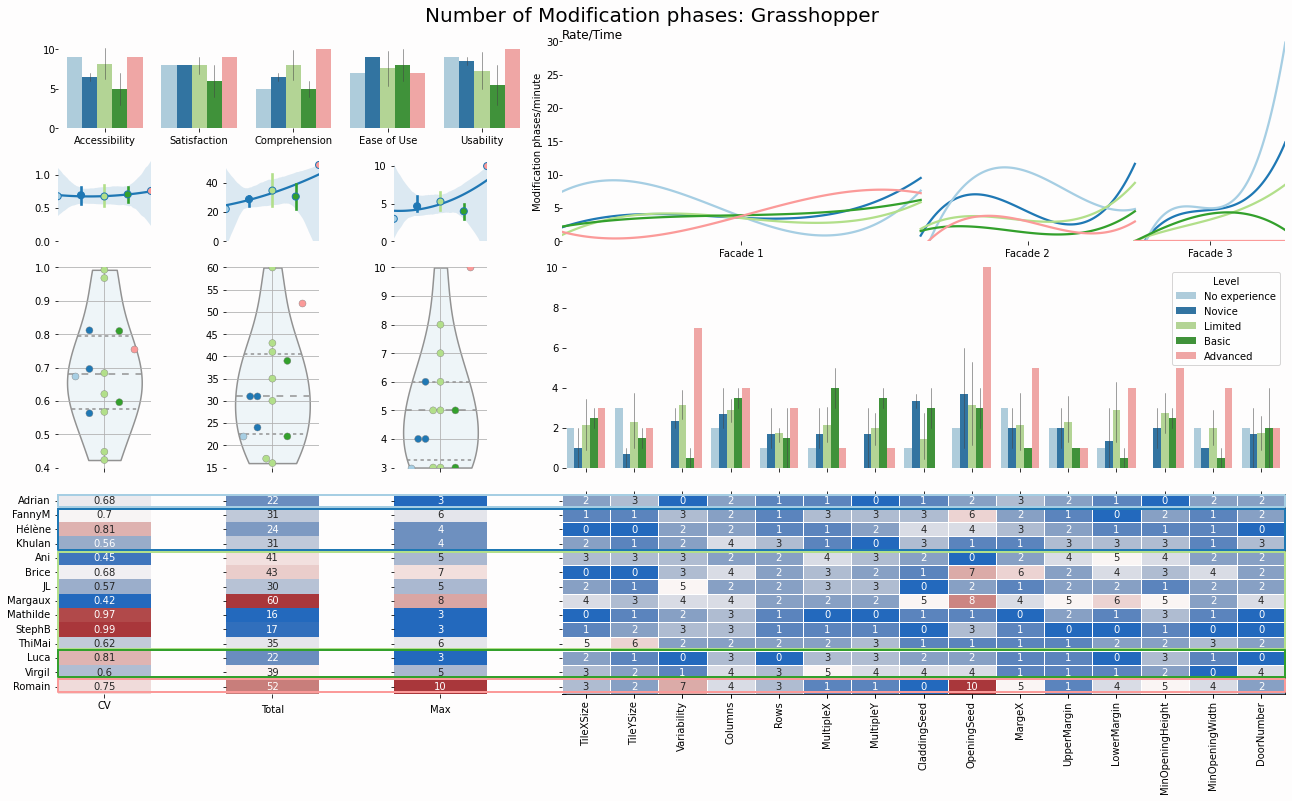

In [54]:
an.context_analysis(0, phase_df, time_phases_df, feedback_df, study_columns=['CV', 'Total', 'Max'], b=4, title='Modification phases')
plt.savefig('output/gh_phases.png',bbox_inches='tight')

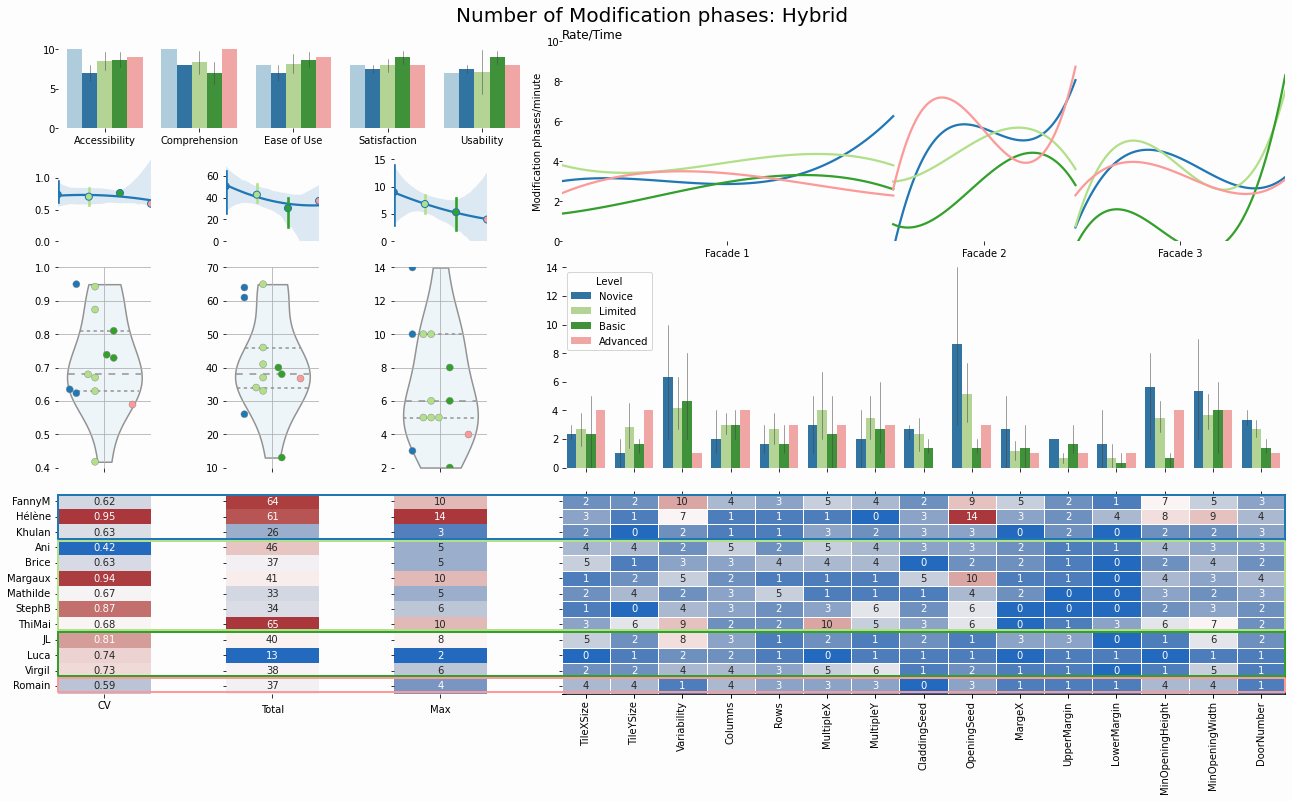

In [55]:
an.context_analysis(1, phase_df, time_phases_df.drop('Adrian', axis=0, level='Name'), feedback_df, study_columns=['CV', 'Total', 'Max'], b=8, title='Modification phases', y2=0.1785)
plt.savefig('output/hybrid_phases.png',bbox_inches='tight')

### Plugin

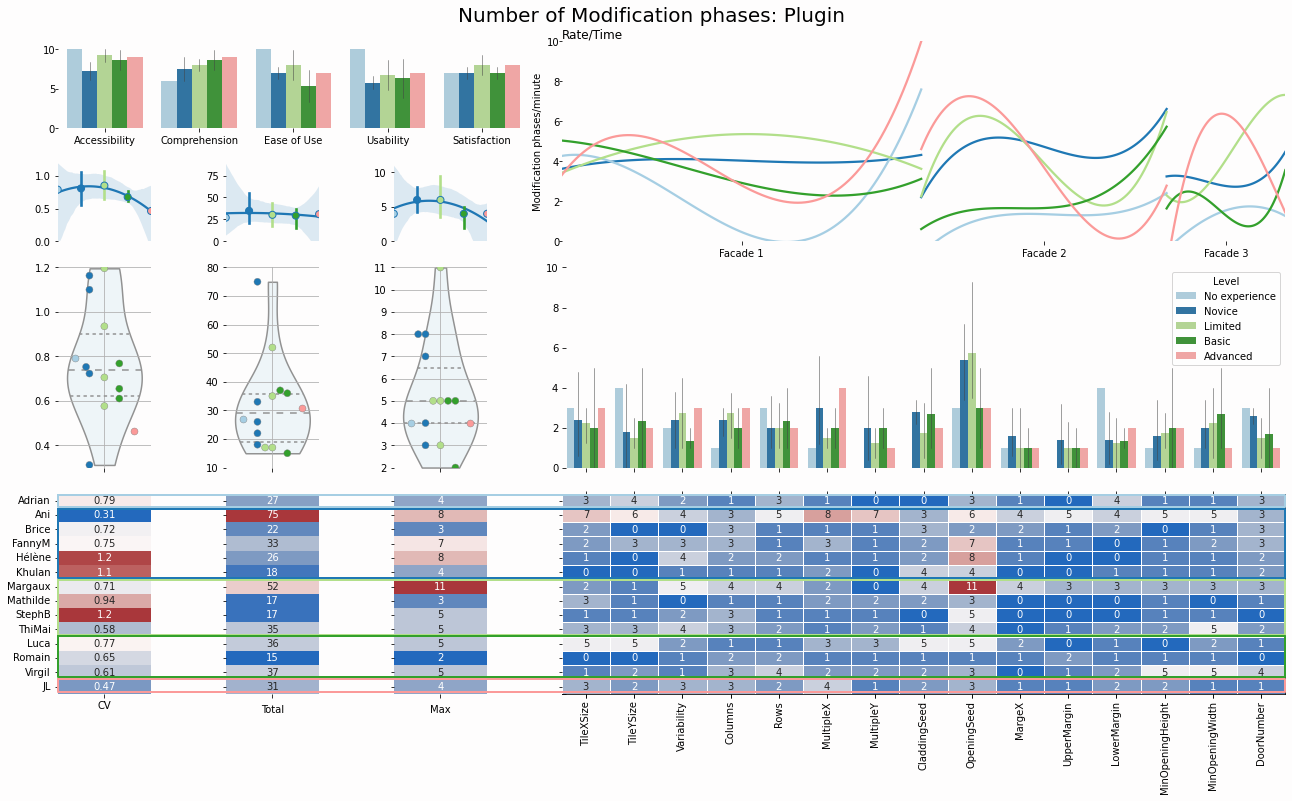

In [56]:
an.context_analysis(2, phase_df, time_phases_df, feedback_df, study_columns=['CV', 'Total', 'Max'], b=3, title='Modification phases')
plt.savefig('output/plugin_phases.png',bbox_inches='tight')

### Total 

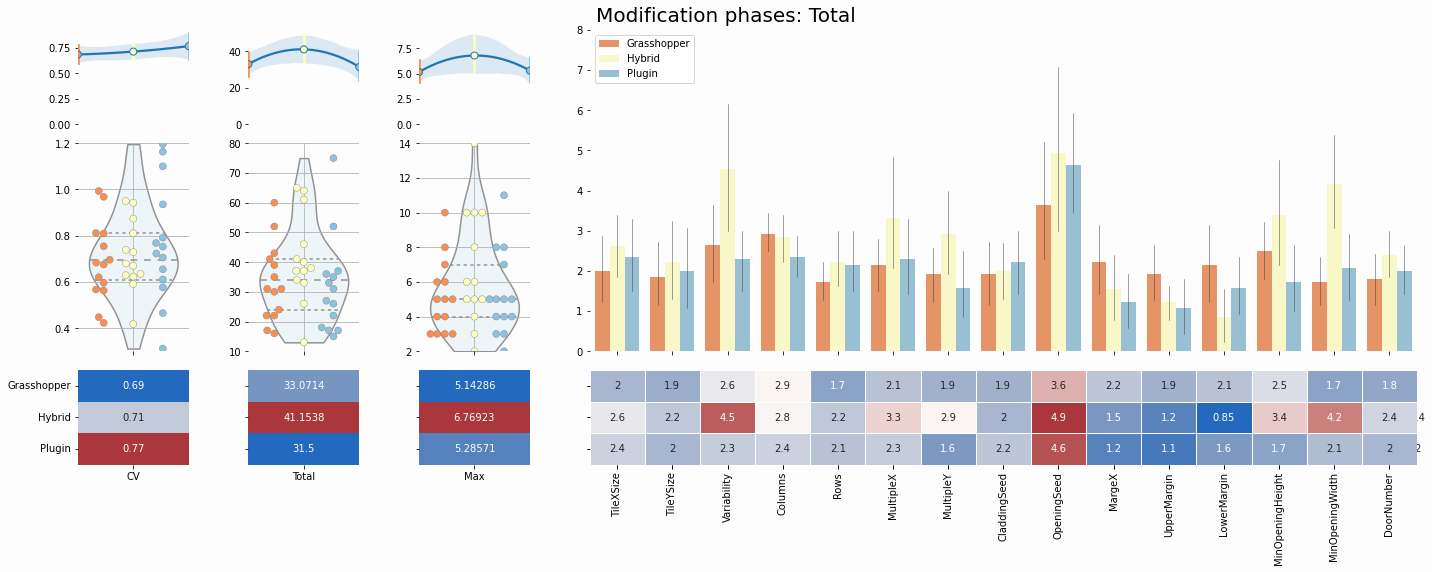

In [57]:
an.global_analysis(phase_df, ['CV', 'Total', 'Max'], 'Modification phases')
plt.savefig('output/global_phases.png',bbox_inches='tight')

## Etude selon l'ordre

### Grasshopper

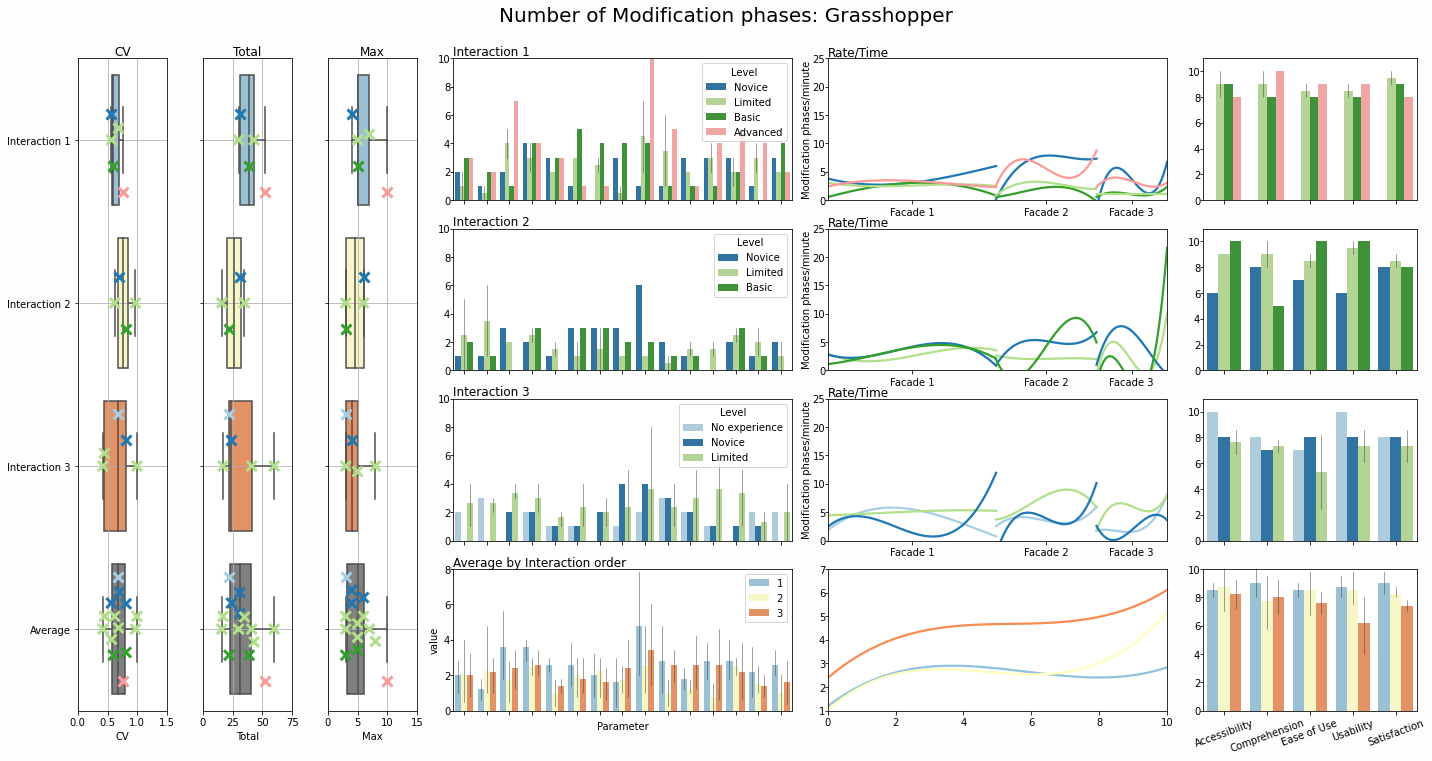

In [58]:
keeplist2 =['CV','Total','Max']
an.order_analysis(1, phase_df, time_phases_df, feedback_df, keeplist2, 4, 'Modification phases')
plt.savefig('output/gh_order_phases.png',bbox_inches='tight')

### Hybrid

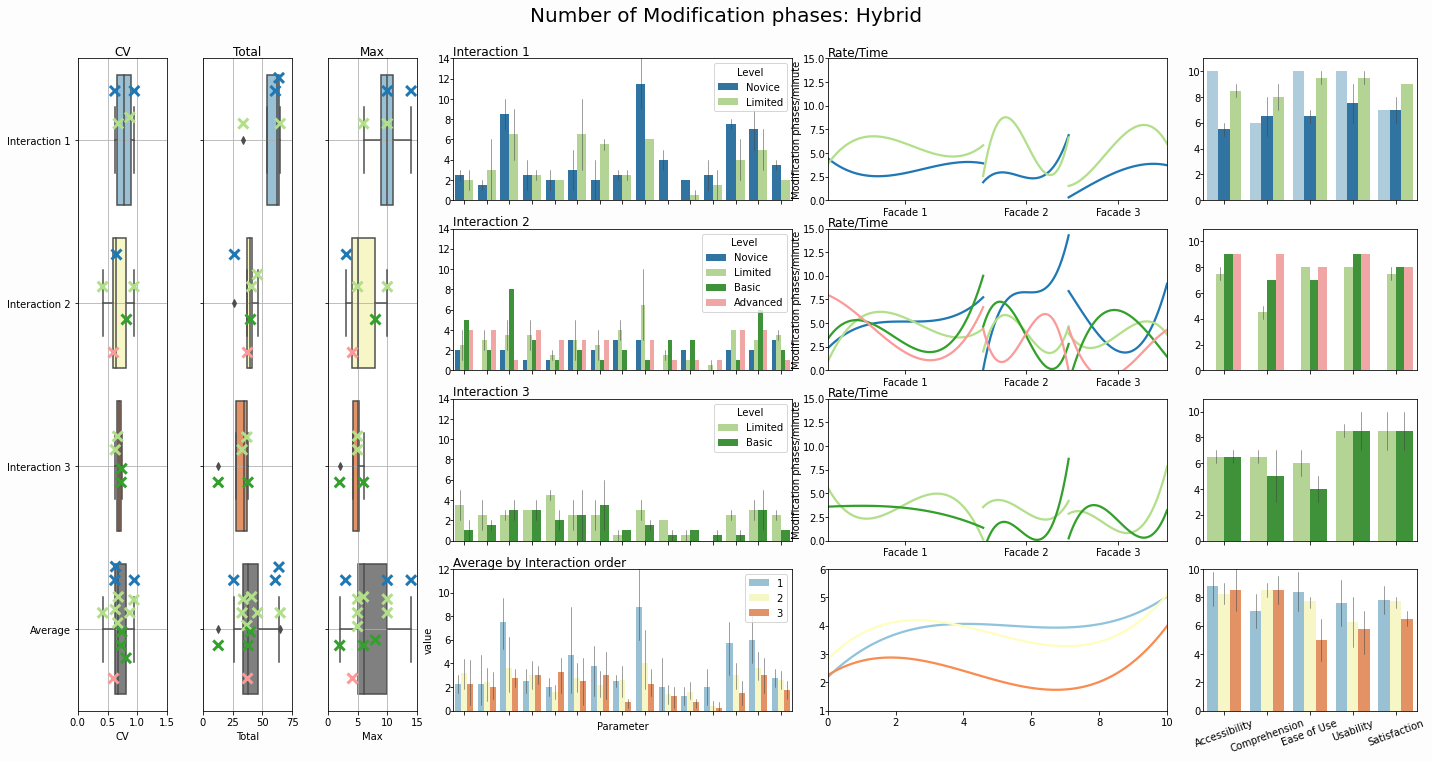

In [59]:
an.order_analysis(2, phase_df, time_phases_df.drop('Adrian', axis=0, level='Name'), feedback_df, keeplist2, 8, 'Modification phases')
plt.savefig('output/hybrid_order_phases.png',bbox_inches='tight')

### Plugin

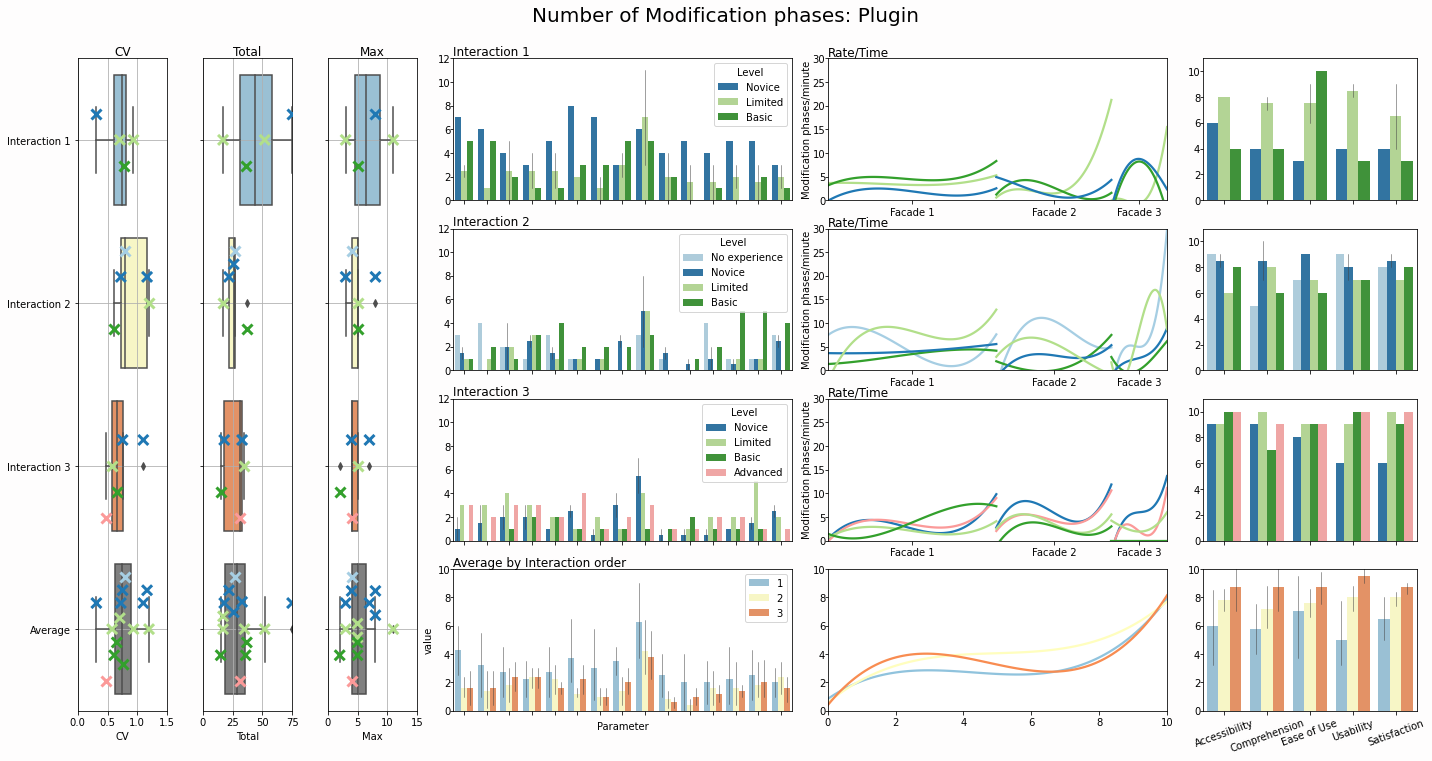

In [60]:
an.order_analysis(3, phase_df, time_phases_df, feedback_df, keeplist2, 3, 'Modification phases')
plt.savefig('output/plugin_order_phases.png',bbox_inches='tight')

# Unique

In [61]:
with pd.option_context('display.max_rows', None, 'display.max_columns', 12,'display.max_colwidth',50):
    display(unique_df.round(decimals=2))
unique_df.round(decimals=2).to_excel('output/testexcel-unique.xlsx')

Time  TileXSize  \
Name     Level     Order Type               Object                      
Khulan   303112001 1     Grasshopper        2       121.00       5.00   
                                            3        92.00       3.00   
                                            4        21.00       1.00   
                   2     Hybrid             2        25.00       1.00   
                                            3        11.00       3.00   
                                            4        12.00       3.00   
                   3     Plugin             2        12.00       1.00   
                                            3        25.00       1.00   
                                            4         4.00       1.00   
                   0     Tot                0       323.00      19.00   
                         Average            0        35.89       2.11   
                         Standard Deviation 0        41.27       1.45   
Adrian   404000100 3     Grasshopper        2        75.00       4.00   
                                            3        17.00       1.00   
                                            4        16.00       5.00   
                   2     Plugin             2        20.00       2.00   
                                            3        25.00       3.00   
                                            4         3.00       2.00   
                   0     Tot                0       220.00      34.00   
                         Average            0        24.44       3.78   
                         Standard Deviation 0        21.39       1.86   
Mathilde 404223002 2     Grasshopper        2        72.00       1.00   
                                            3        25.00       1.00   
                                            4         4.00       1.00   
                   3     Hybrid             2        21.00       1.00   
                                            3        50.00      13.00   
                                            4        17.00       4.00   
                   1     Plugin             2        20.00       3.00   
                                            3         3.00       2.00   
                                            4         3.00       2.00   
                   0     Tot                0       215.00      28.00   
                         Average            0        23.89       3.11   
                         Standard Deviation 0        23.28       3.86   
Virgil   303334003 1     Grasshopper        2        81.00       5.00   
                                            3        29.00       2.00   
                                            4        20.00       1.00   
                   3     Hybrid             2        68.00       9.00   
                                            3         2.00       1.00   
                                            4        11.00       1.00   
                   2     Plugin             2        24.00       2.00   
                                            3        31.00       1.00   
                                            4        10.00       1.00   
                   0     Tot                0       276.00      23.00   
                         Average            0        30.67       2.56   
                         Standard Deviation 0        26.75       2.74   
FannyM   404113101 2     Grasshopper        2       102.00       5.00   
                                            3        40.00       1.00   
                                            4        24.00       1.00   
                   1     Hybrid             2       111.00      11.00   
                                            3        41.00       1.00   
                                            4        20.00       1.00   
                   3     Plugin             2        45.00       2.00   
                                            3        32.00       3.00   
                                       

## Étude Générale

### Grasshopper

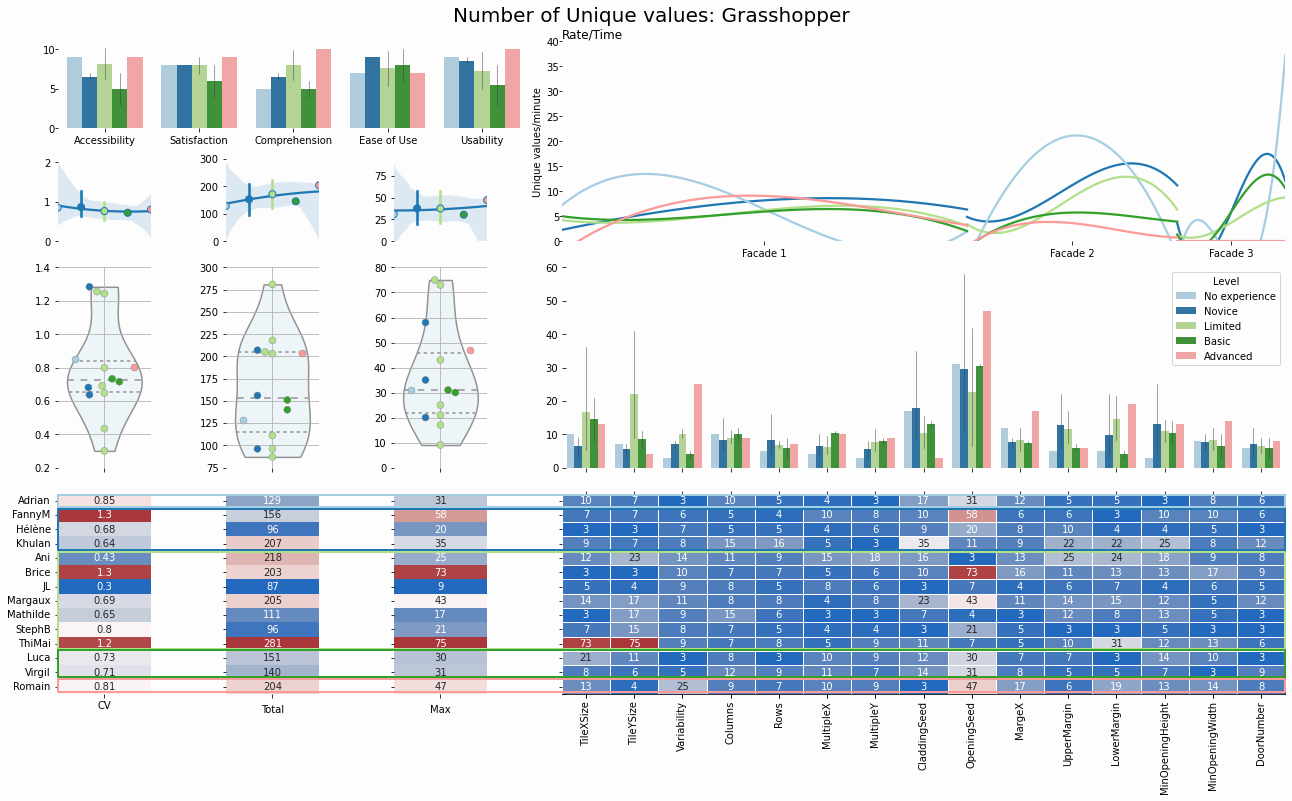

In [62]:
an.context_analysis(0, unique_df, time_unique_df, feedback_df, study_columns=['CV', 'Total', 'Max'], b=4, title='Unique values')
plt.savefig('output/gh_unique.png',bbox_inches='tight')

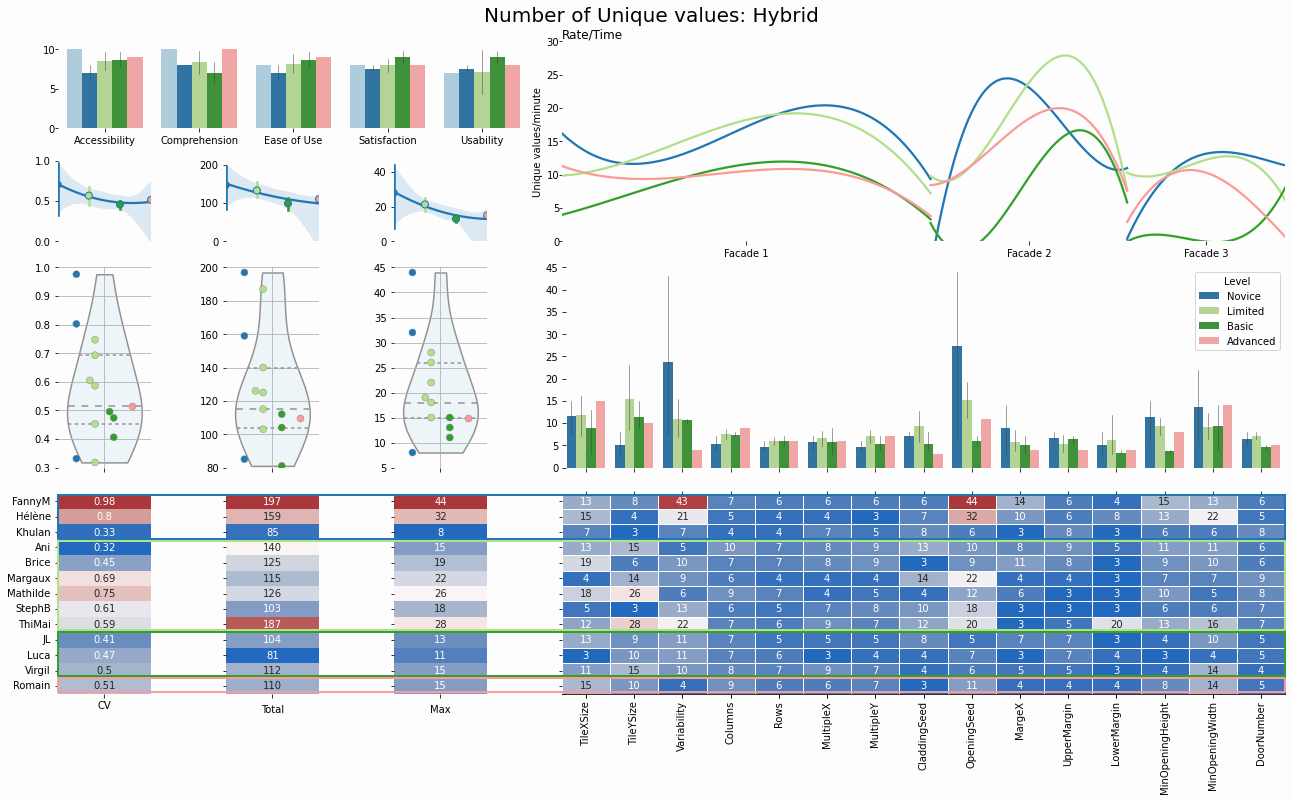

In [63]:
an.context_analysis(1, unique_df.drop('Adrian', axis=0, level='Name'), time_unique_df.drop('Adrian', axis=0, level='Name'), feedback_df, study_columns=['CV', 'Total', 'Max'], b=8, title='Unique values', y2=0.1785)
plt.savefig('output/hybrid_unique.png',bbox_inches='tight')

### Plugin

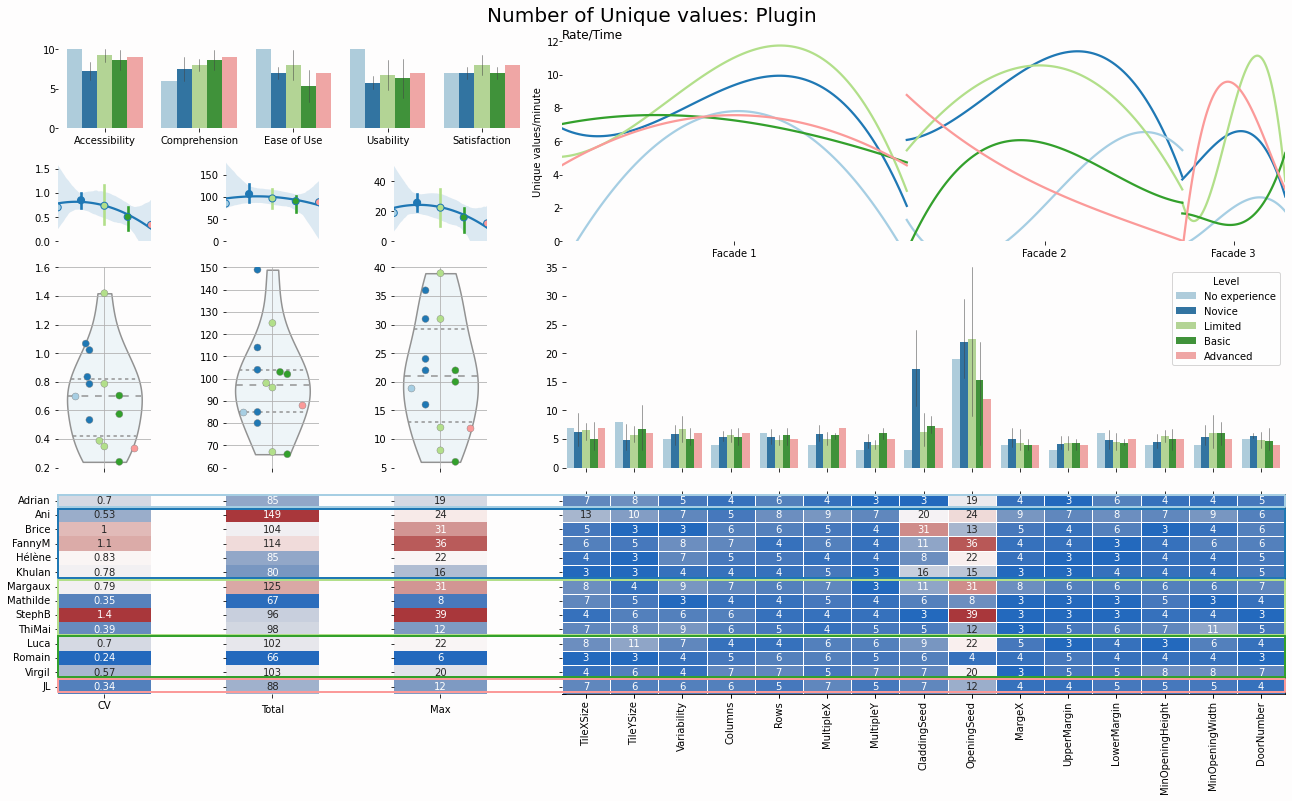

In [64]:
an.context_analysis(2, unique_df, time_unique_df, feedback_df, study_columns=['CV', 'Total', 'Max'], b=3, title='Unique values', y2=0.175)
plt.savefig('output/plugin_unique.png',bbox_inches='tight')

### Total 

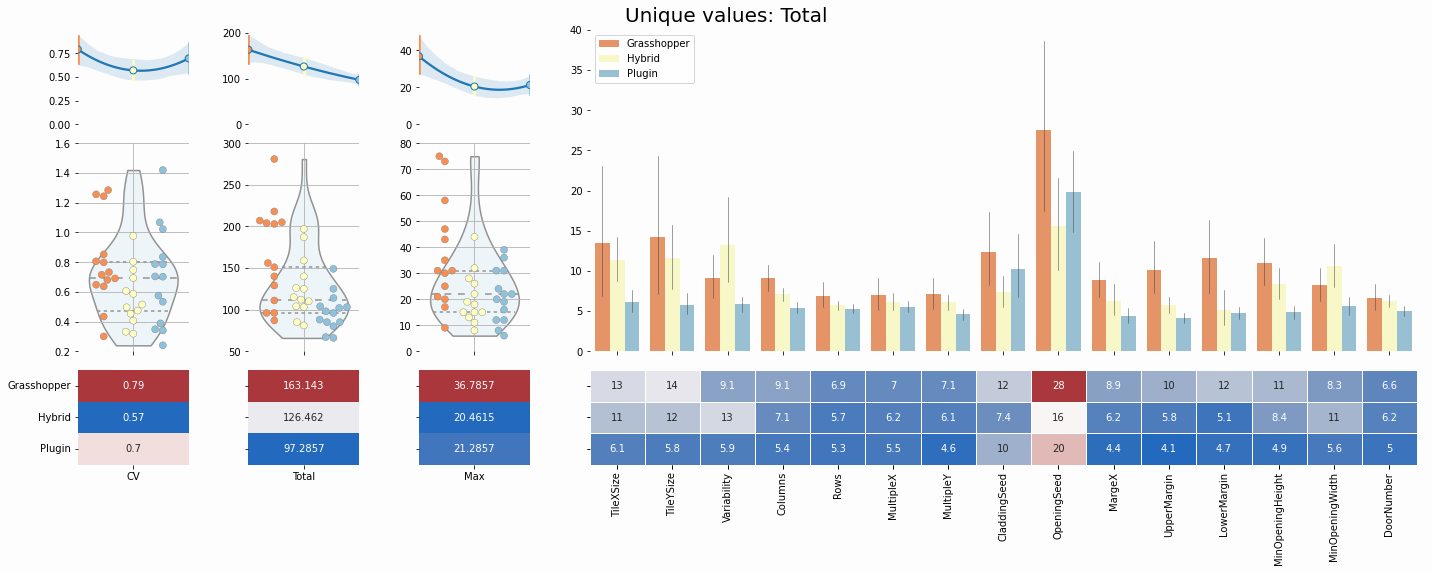

In [65]:
an.global_analysis(unique_df, ['CV', 'Total', 'Max'], 'Unique values')
plt.savefig('output/global_unique.png',bbox_inches='tight')

## Etude selon l'ordre

### Grasshopper

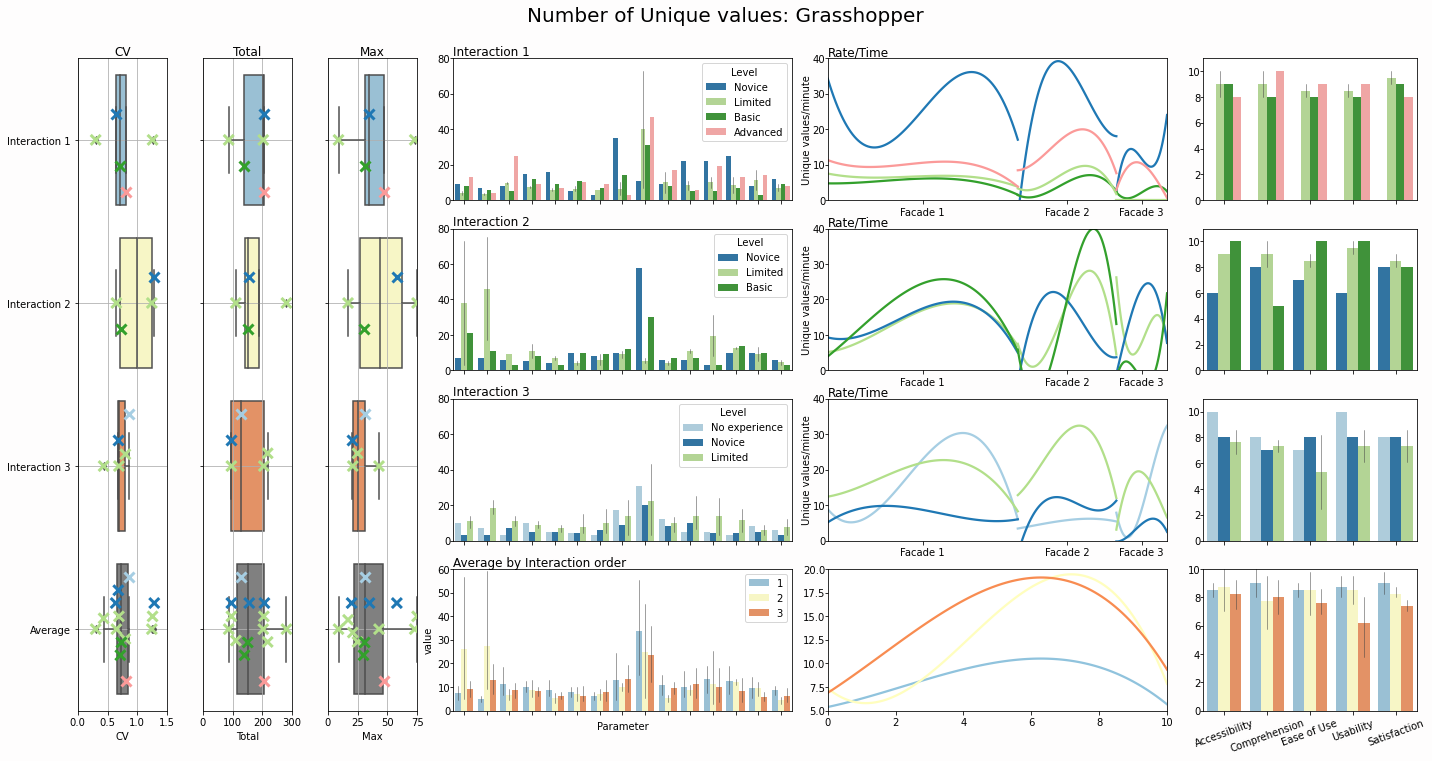

In [66]:
keeplist3 =['CV','Total','Max']
an.order_analysis(1, unique_df, time_unique_df, feedback_df, keeplist3, 4, 'Unique values')
plt.savefig('output/gh_order_unique.png',bbox_inches='tight')

### Hybrid

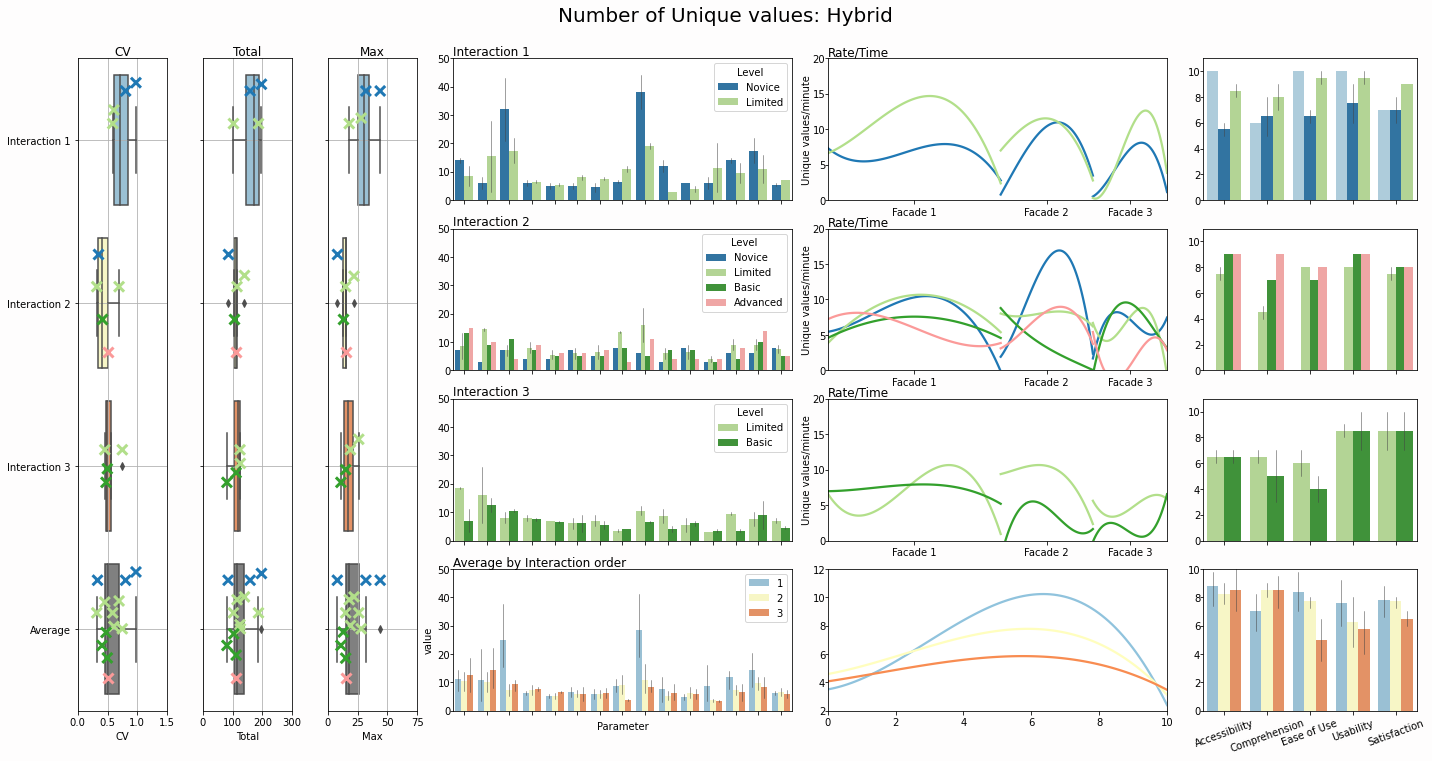

In [67]:
an.order_analysis(2, unique_df, time_unique_df.drop('Adrian', axis=0, level='Name'), feedback_df, keeplist3, 8, 'Unique values')
plt.savefig('output/hybrid_order_unique.png',bbox_inches='tight')

### Plugin

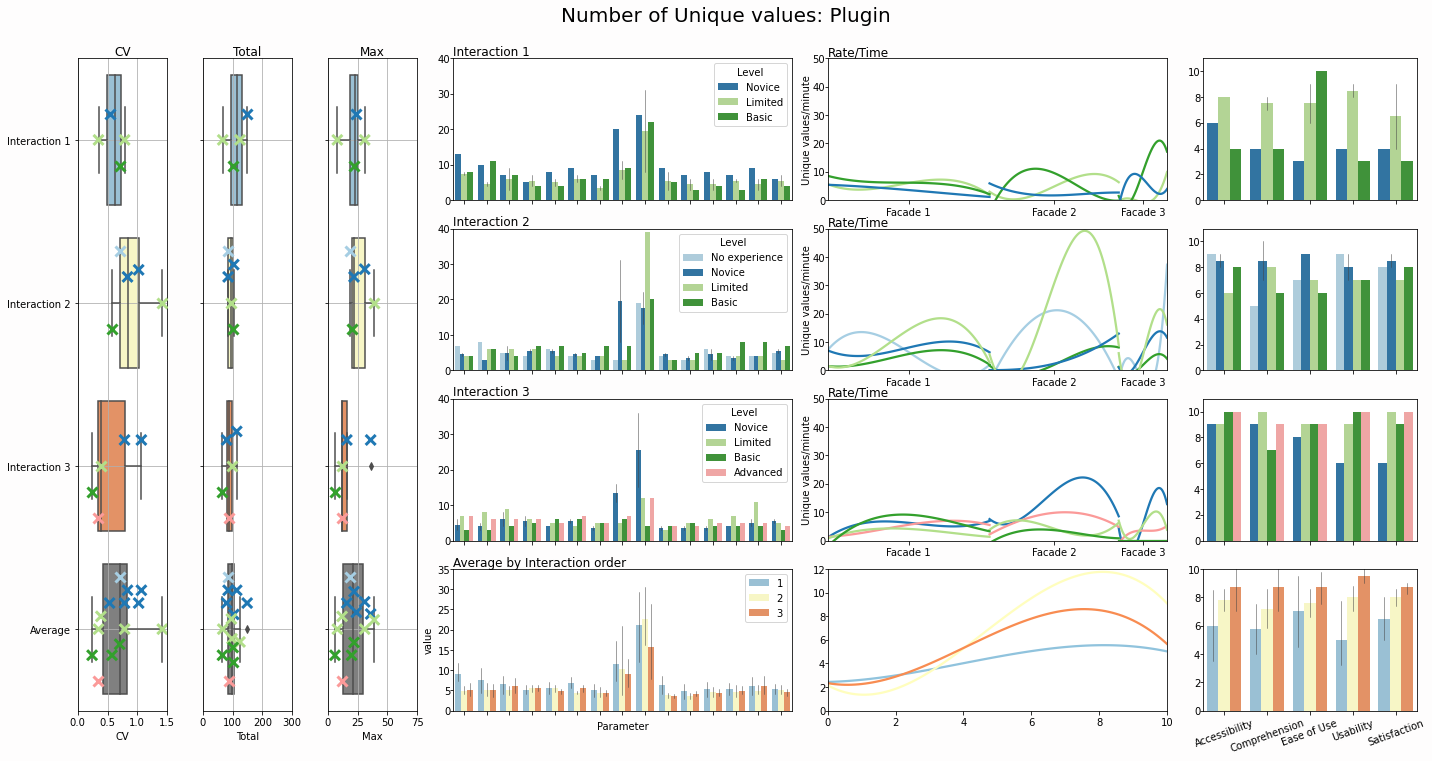

In [68]:
an.order_analysis(3, unique_df, time_unique_df, feedback_df, keeplist3, 3, 'Unique values')
plt.savefig('output/plugin_order_unique.png',bbox_inches='tight')